In [2]:
import skimage
from skimage import data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

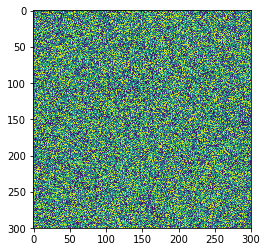

In [9]:
sample_image = np.random.random([300,300])
plt.imshow(sample_image)

([], <a list of 0 Text yticklabel objects>)

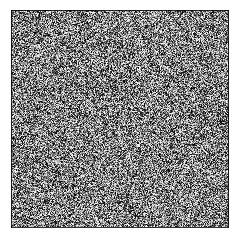

In [11]:
# display in greyscale
plt.imshow(sample_image,
           cmap="gray",
           interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [ ]:
# display in spectral color map
plt.imshow(sample_image,
           cmap="Spectral",
           interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [12]:
camera=data.camera()

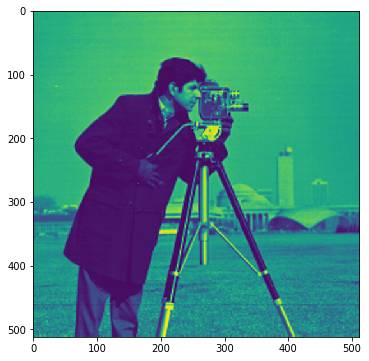

In [13]:
plt.figure(figsize=(8,6))
plt.imshow(camera)

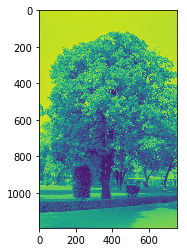

In [16]:
# read an image from a local folder
tree = skimage.io.imread("./images/tree.jpeg",as_gray=True)
plt.imshow(tree)

In [17]:
tree.shape

(1192, 752)

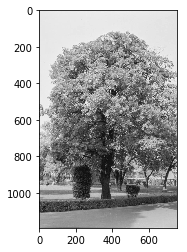

In [18]:
plt.imshow(tree,cmap="gray")

In [22]:
tree_copy = tree.copy()
tree_copy[100,200]

# update a pixel in the photo matrix
tree_copy[100,200] = 0

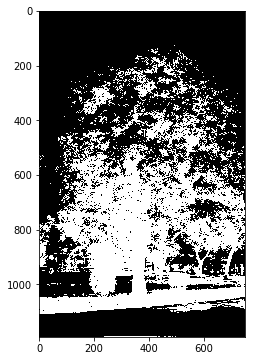

In [23]:
# manipute image using mask - this turns all pixels with colors in the original picture into white
mask = tree_copy < 0.5
tree_copy[mask] = 255
plt.figure(figsize=(8,6))
plt.imshow(tree_copy,cmap="gray")

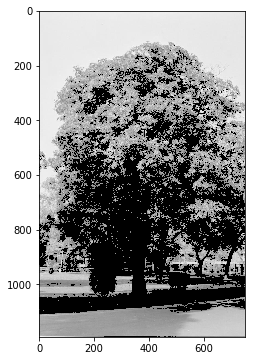

In [24]:
# a different mask which shows the tree in black
tree_copy = tree.copy()
mask = tree_copy < 0.5
tree_copy[mask] = 0
plt.figure(figsize=(8,6))
plt.imshow(tree_copy,cmap="gray")

### Masking 

(3456, 3414, 3)

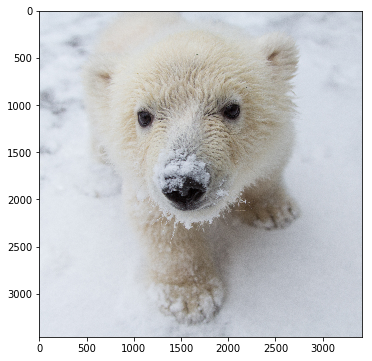

In [26]:
bear = skimage.io.imread("./images/bear.jpeg")
plt.figure(figsize=(8,6))
plt.imshow(bear,interpolation="nearest")

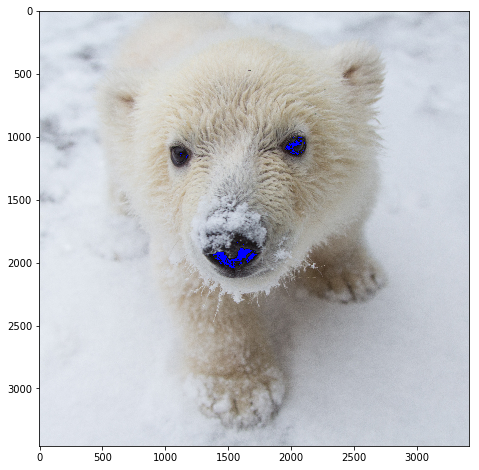

In [29]:
# apply a blue mask which turns pixels < 15 in blue channel value into bright blue
blue_mask = bear[:,:,2] < 15
bear_copy = bear.copy()
bear_copy[blue_mask] = [0,0,255]
plt.figure(figsize = (8,8))
plt.imshow(bear_copy)

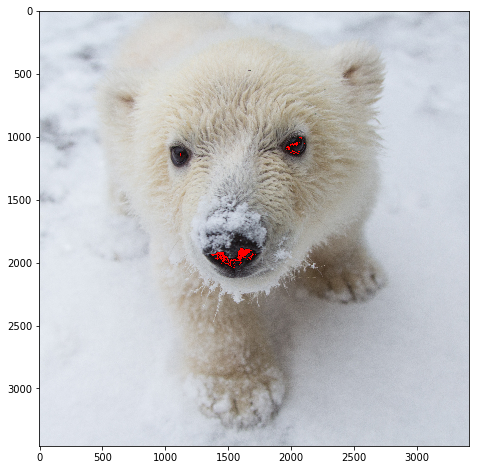

In [32]:
# apply a red mask which turns pixels < 15 in blue channel value into bright blue
red_mask = bear[:,:,0]<15

bear_copy = bear.copy()
bear_copy[red_mask] = [255,0,0]
plt.figure(figsize=(8,8))
plt.imshow(bear_copy)

### Zoom into a particular portion of the image

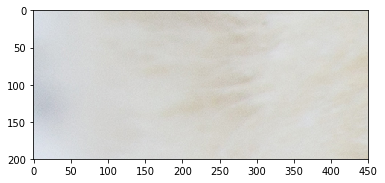

In [34]:
bear_zoom = bear[900:1100,450:900]
plt.imshow(bear_zoom)

In [35]:
many_trees = np.array([tree.copy(),tree.copy(),tree.copy(),tree.copy()])
many_trees.shape
# this returns (batch_size,height, width)

(4, 1192, 752)

### Block views and pooling operations

(360, 480)

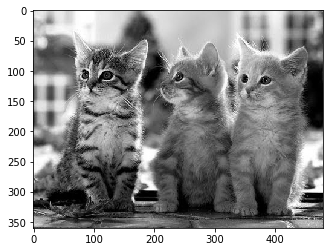

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from skimage import color
from skimage.util import view_as_blocks

three_cats = skimage.io.imread("./images/three_cats.jpeg")
three_cats = color.rgb2gray(three_cats)
plt.imshow(three_cats,cmap="gray")
three_cats.shape # if the image is color, then the output would be a tuple with three values and ends with "3"

In [71]:
block_shape = (4, 4) 

Note that the block shape should be a dividor of the shape of the photo. For example, if you use **(7,7)** for this photo of shape **(360, 480)**, then it will throw an error 
*view_as_blocks 'block_shape' is not compatible with 'arr_in'*


In [72]:
three_cats_blocks = view_as_blocks(three_cats,block_shape)

In [73]:
three_cats_blocks.shape
# returns a tuple of (Height/block_shape[0], Width/block_shape[1], block_shape[0], block_shape[1])

(90, 120, 4, 4)

### Flatten the last dimension using the reshape() function in numpy

In [74]:
flattened_blocks = three_cats_blocks.reshape(three_cats_blocks.shape[0],three_cats_blocks.shape[1], -1)
# flattens the last two dimensions into a single 1D array
print("Shape of the block image: ", three_cats_blocks.shape)
print("Shape of the flattened blocks: ", flattened_blocks.shape)

Shape of the block image:  (90, 120, 4, 4)
Shape of the flattened blocks:  (90, 120, 16)


### Mean-pooling: find the mean value for each block

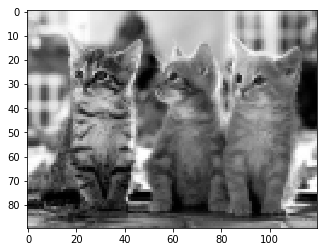

In [75]:
mean_blocks = np.mean(flattened_blocks, axis=2)
plt.imshow(mean_blocks, interpolation = "nearest",cmap="gray")

You can see that the pooled image is more blurry than the original.

### Max-pooling: find the max value for each block

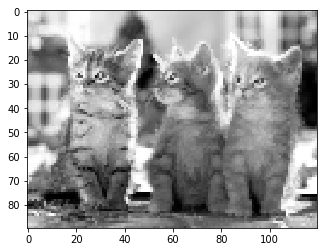

In [77]:
max_blocks = np.max(flattened_blocks, axis=2)
plt.imshow(max_blocks, interpolation = "nearest",cmap="gray")

### Median-pooling

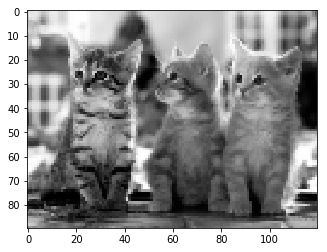

In [78]:
median_blocks = np.median(flattened_blocks, axis=2)
plt.imshow(median_blocks, interpolation = "nearest",cmap="gray")

### Contour detection using the marching squares algorithm

#### 1. A simple example with triangles

In [83]:
import skimage.io
from skimage import measure
from skimage import color
from skimage.util import view_as_blocks

shapes = skimage.io.imread("./images/shapes.png")
shapes.shape

(288, 512, 3)

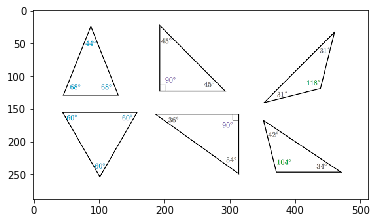

In [81]:
plt.imshow(shapes)

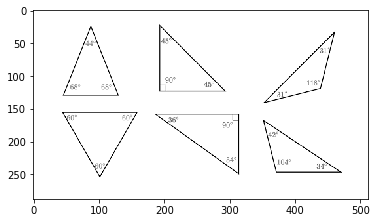

In [86]:
shapes = color.rgb2gray(shapes)
plt.imshow(shapes,cmap="gray")

In [95]:
contours = measure.find_contours(shapes, 0.5)
len(contours)

85

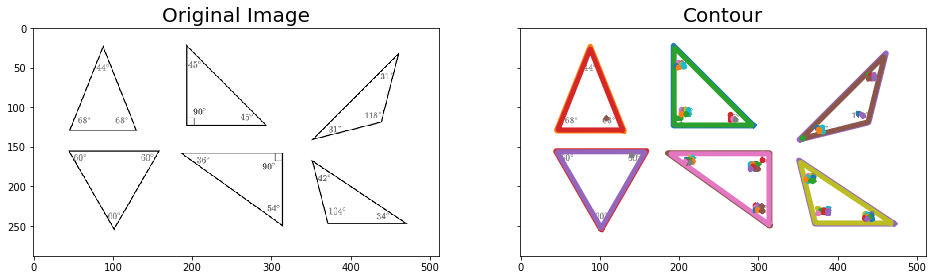

In [96]:
fig, axes = plt.subplots(1,2, figsize=(16,12),
                        sharex = True, sharey=True)
ax = axes.ravel()

ax[0].imshow(shapes, cmap="gray")
ax[0].set_title("Original Image", fontsize=20)

ax[1].imshow(shapes, cmap="gray",interpolation="nearest")
ax[1].set_title("Contour",fontsize=20)

for n, contour in enumerate(contours):
    ax[1].plot(contour[:,1],contour[:, 0],linewidth = 5)
    
plt.show()

#### 2. A more complex example with curves

In [97]:
A, B = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
complex_image = np.sin(np.exp((np.sin(A)**3 + np.cos(B)**3)))
complex_image.shape

(100, 100)

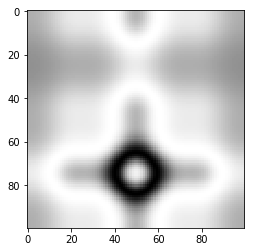

In [98]:
plt.imshow(complex_image, cmap="gray")

In [99]:
contours = measure.find_contours(complex_image, 0.7)
len(contours)

7

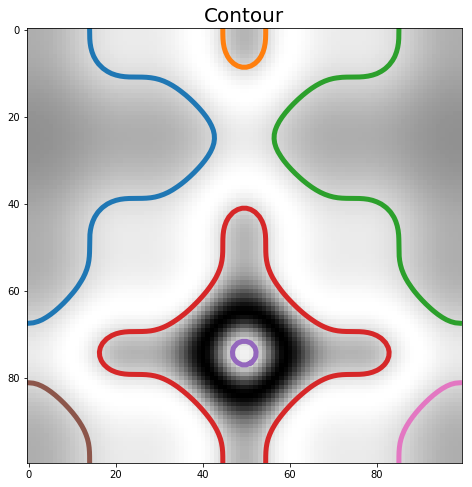

In [101]:
fig, axes = plt.subplots(figsize=(12, 8))

axes.imshow(complex_image,
           cmap="gray",
           interpolation = "nearest")
axes.set_title("Contour",fontsize=20)

for n, contour in enumerate(contours):
    axes.plot(contour[:,1], contour[:,0], linewidth = 5)
    
plt.show()

### Convex Hull

**Definition**: Give a X, a set of points in a plane, the convex hull of X is the smallest convex polygon that contains all points in X. Used for pattern reconition.

In [102]:
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

In [104]:
horse_image = data.horse()
horse_inverted = invert(data.horse())

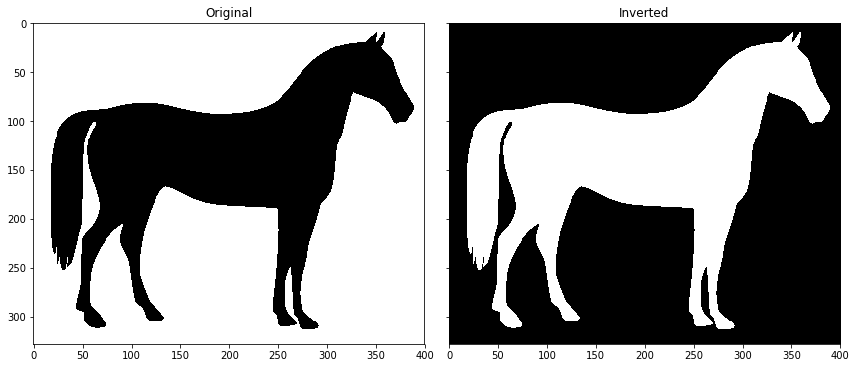

In [105]:
fig, axes = plt.subplots(1,2,
                        figsize=(12,8),
                        sharex=True, sharey = True)

ax = axes.ravel()

ax[0].set_title("Original")
ax[0].imshow(horse_image,cmap="gray")

ax[1].set_title("Inverted")
ax[1].imshow(horse_inverted,cmap="gray")

fig.tight_layout()
plt.show()

In [108]:
# find the convex hull for the white data points
convexhull_horse = convex_hull_image(horse_inverted)

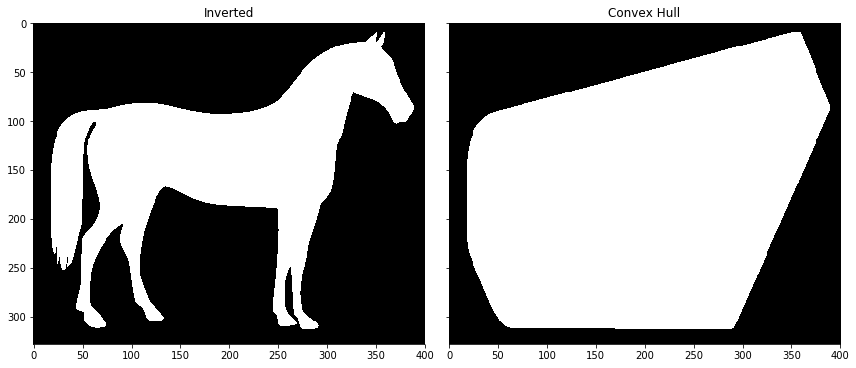

In [109]:
fig, axes = plt.subplots(1,2,
                        figsize=(12,8),
                        sharex=True, sharey = True)

ax = axes.ravel()

ax[0].set_title("Inverted")
ax[0].imshow(horse_inverted,cmap="gray")

ax[1].set_title("Convex Hull")
ax[1].imshow(convexhull_horse,cmap="gray")

fig.tight_layout()
plt.show()

In [111]:
# overlaying the convex hull on top of the inverted horse image
convexhull_diff = img_as_float(convexhull_horse.copy())
convexhull_diff[horse_inverted]=2

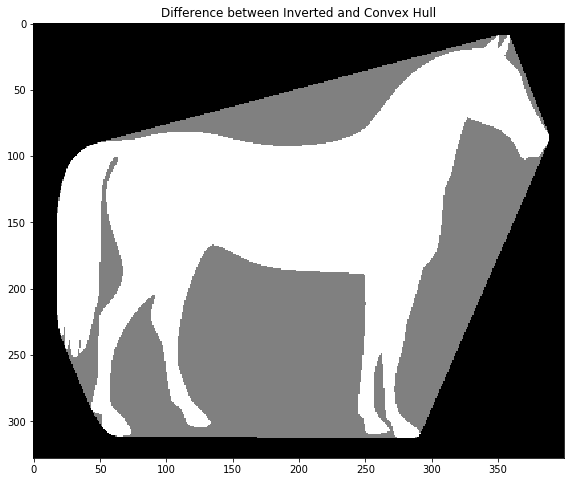

In [112]:
fig, ax = plt.subplots(figsize=(12,8))

ax.imshow(convexhull_diff,
         cmap = "gray",
         interpolation="nearest")

ax.set_title("Difference between Inverted and Convex Hull")

plt.show()

### Edge Detection
**search-based** (using first-order derivatives) vs. **zero-crossing** ( more sophisticated, using second-order derivatives)

1. **Roberts cross detection**
2. **Sobel edge detection**

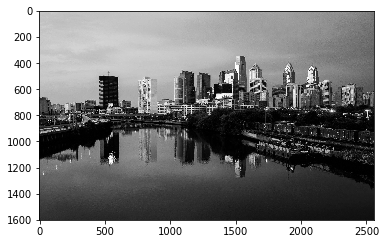

In [119]:
from skimage import color, data, io
from skimage.filters import roberts, sobel

sky = skimage.io.imread("./images/sky.jpeg")
sky = color.rgb2gray(sky)

plt.figure(figsize=(6,6))
plt.imshow(sky,cmap="gray")

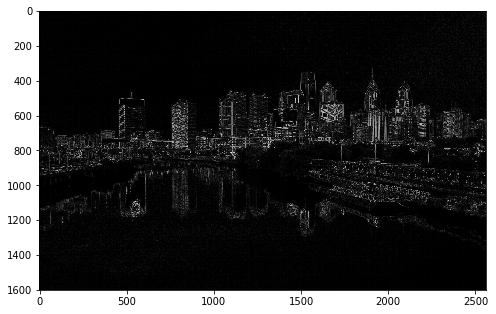

In [120]:
# Roberts cross detection
sky_roberts = roberts(sky)

plt.figure(figsize=(8,8))
plt.imshow(sky_roberts,cmap="gray")

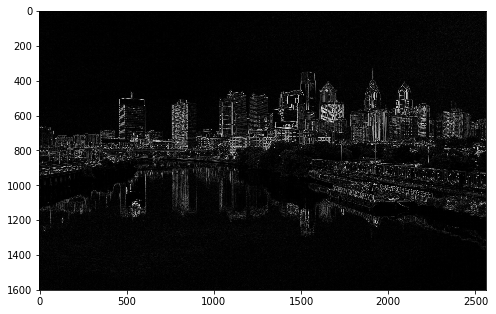

In [121]:
# Sobel edge detection
sky_sobel = sobel(sky)

plt.figure(figsize=(8,8))
plt.imshow(sky_sobel,cmap="gray")

**Sobel edge detector** is in general more sensitive to **diagonal edges** and better at detecting them as opposed to horizontal or vertical edges.

### Canny edge detection: better performance than Roberts and Sobel, especially for noisy images

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.draw import polygon

In [123]:
sample_image = np.zeros((500,500),dtype=np.double)

In [125]:
poly = np.array(((200,100),
                (150,200),
                (150,300),
                (250,300),
                (350,200))) # this specifies the vertices
rr, cc = polygon(poly[:, 0],poly[:,1],sample_image.shape)

sample_image[rr,cc]=1

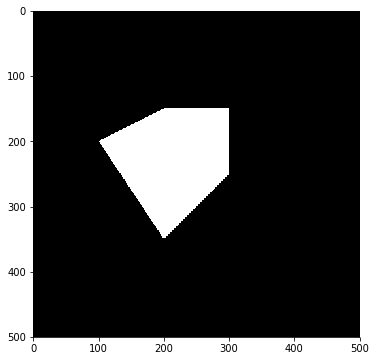

In [126]:
plt.figure(figsize=(6,6))
plt.imshow(sample_image,cmap="gray")

In [128]:
im = ndi.gaussian_filter(sample_image,4)
im += 0.2 * np.random.random(im.shape)

In [130]:
edges1 = canny(im, sigma=1)
edges12 = canny(im, sigma =1.3)
edges2 = canny(im, sigma = 1.7)


Larger value of sigma = less sensitive to noise

Text(0.5,1,'Canny filter, $\\sigma = 1.7$')

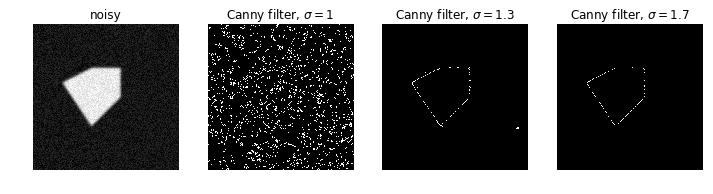

In [131]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=4, figsize=(12,4),
                                     sharex=True,sharey=True)

ax0.imshow(im, cmap="gray")
ax0.axis("off")
ax0.set_title("noisy")

ax1.imshow(edges1, cmap="gray")
ax1.axis("off")
ax1.set_title("Canny filter, $\sigma = 1$")

ax2.imshow(edges12, cmap="gray")
ax2.axis("off")
ax2.set_title("Canny filter, $\sigma = 1.3$")

ax3.imshow(edges2, cmap="gray")
ax3.axis("off")
ax3.set_title("Canny filter, $\sigma = 1.7$")